## Run the code for decoded image data 
python run.py test --model Z --data_path /Users/haotian/Documents/Python/CORnet_DicarloLab/data/ --output_path /Users/haotian/Documents/Python/CORnet_DicarloLab/data_output/

In [29]:
!python run.py test --layer='V1' --sublayer='output' --model S --data_path /Users/haotian/Documents/Python/CORnet_DicarloLab/data/ --output_path /Users/haotian/Documents/Python/CORnet_DicarloLab/data_output/

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 12.24it/s]


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/Users/haotian/Documents/Python/CORnet_DicarloLab/CORnet'

In [109]:
features_V1 = np.load('../data_output/CORnet-S_V1_output_feats.npy') 

In [110]:
features_V2 = np.load('../data_output/CORnet-S_V2_output_feats.npy') 

In [111]:
features_V4 = np.load('../data_output/CORnet-S_V4_output_feats.npy') 

In [112]:
features_IT = np.load('../data_output/CORnet-S_IT_output_feats.npy')

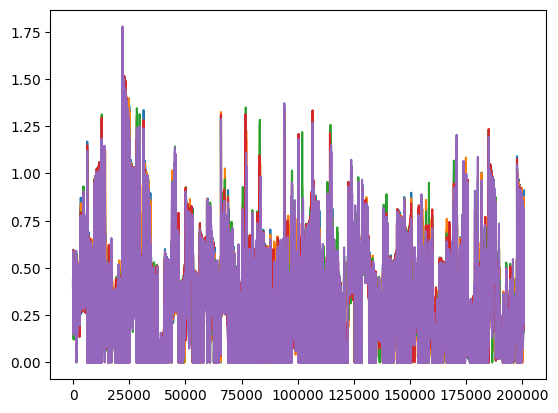

In [116]:
for i in range(np.shape(features_V1)[0]):
    feats = features_V1[i]
    plt.plot(feats)

In [ ]:
56*56*64

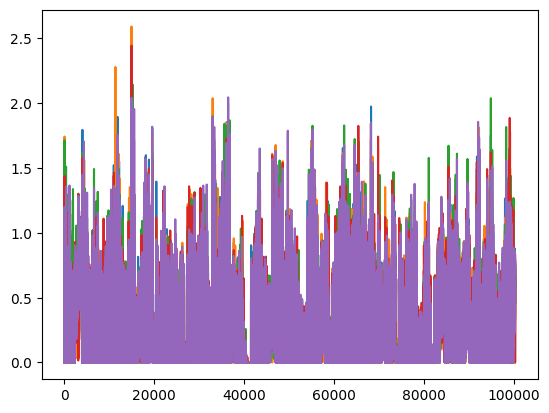

In [113]:
for i in range(np.shape(features_V2)[0]):
    feats = features_V2[i]
    plt.plot(feats)

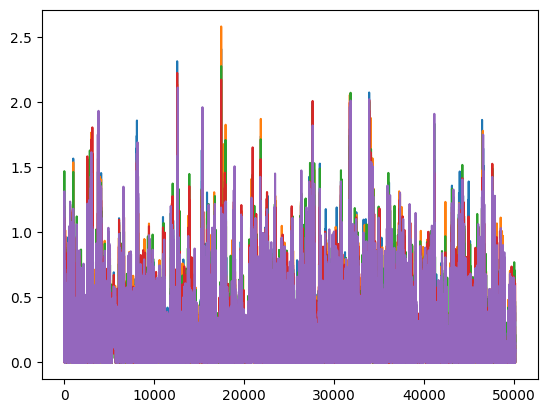

In [114]:
for i in range(np.shape(features_V4)[0]):
    feats = features_V4[i]
    plt.plot(feats)

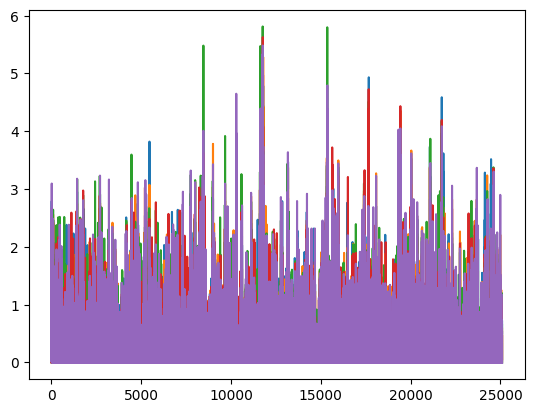

In [115]:
for i in range(np.shape(features_IT)[0]):
    feats = features_IT[i]
    plt.plot(feats)

In [147]:
def get_model(pretrained=False):
    map_location = 'cpu'
    model = getattr(cornet, f'cornet_s')
    model = model(pretrained=pretrained, map_location=map_location)
    model = model.module  # remove DataParallel

    return model

In [151]:
model = get_model(pretrained=True)

In [155]:
model.decoder

Sequential(
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (flatten): Flatten()
  (linear): Linear(in_features=512, out_features=1000, bias=True)
  (output): Identity()
)

In [156]:
getattr(getattr(model, 'decoder'),'avgpool')

AdaptiveAvgPool2d(output_size=1)

In [159]:
import torchvision

In [162]:
normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])
imsize=224

In [ ]:
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize((imsize, imsize)),
                torchvision.transforms.ToTensor(),
                normalize,
            ])
model.eval()